In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Data Reading

In [4]:
df=pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

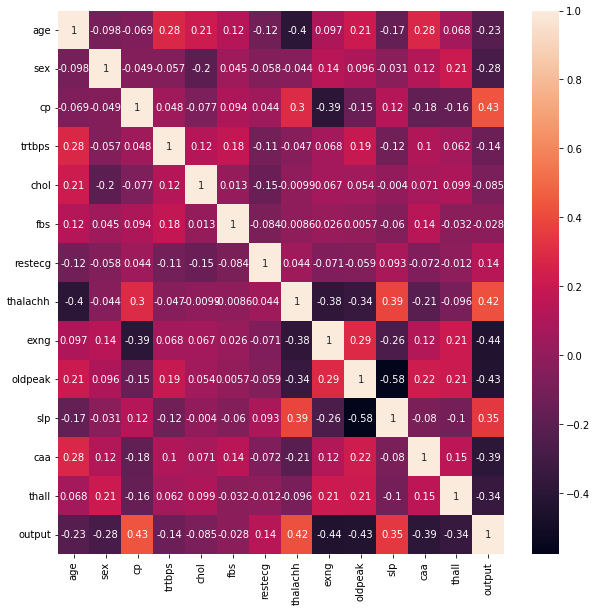

In [10]:
#correlation of each features in dataset
corrmat=df.corr()
top_corr_features =corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_features].corr(),annot=True)

Data distribution of Each features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d7346b490>,
      dtype=object)

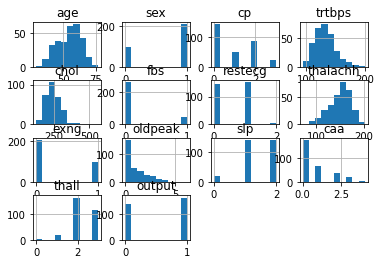

In [11]:
df.hist()

here distribution is standard normal distribution.

check ,is target of the dataset balance or imbalance?

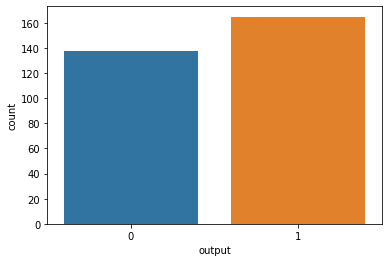

In [12]:
sns.countplot(x=df['output'])

In [15]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age:',minAge,'MaxAge:',maxAge,'MeanAge:',meanAge)

Min Age: 29 MaxAge: 77 MeanAge: 54.366336633663366


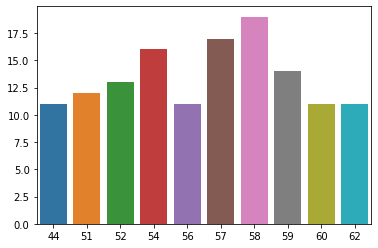

In [39]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)

max data is related to age of 58.

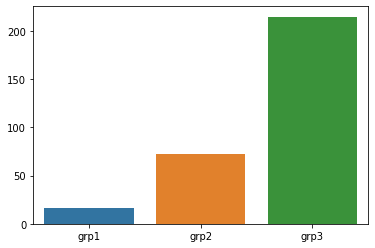

In [40]:
grp1=df[(df.age>=29) & (df.age<40)]
grp2=df[(df.age>=40) & (df.age<50)]
grp3=df[(df.age>=50)]
sns.barplot(x=['grp1','grp2','grp3'],y=[len(grp1),len(grp2),len(grp3)])

grp3 is the group of patient having age 50+.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


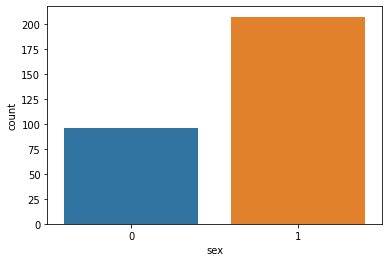

In [42]:
sns.countplot(df['sex'])

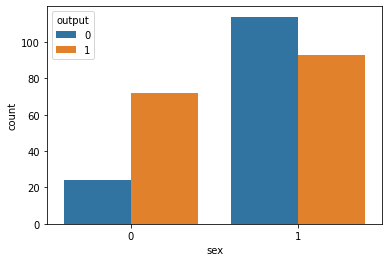

In [43]:
sns.countplot(x=df["sex"], hue=df["output"])


In [44]:
df.groupby(["sex"])["output"].value_counts()

sex  output
0    1          72
     0          24
1    0         114
     1          93
Name: output, dtype: int64

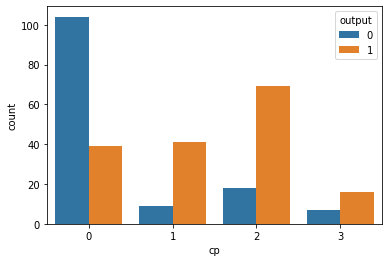

In [46]:
sns.countplot(x=df['cp'],hue=df['output'])

In [47]:
df.groupby(["cp"])["output"].value_counts()

cp  output
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: output, dtype: int64

In [48]:
df.groupby(["restecg"])["output"].value_counts()

restecg  output
0        0         79
         1         68
1        1         96
         0         56
2        0          3
         1          1
Name: output, dtype: int64

Pairwise Relationship in DataSet

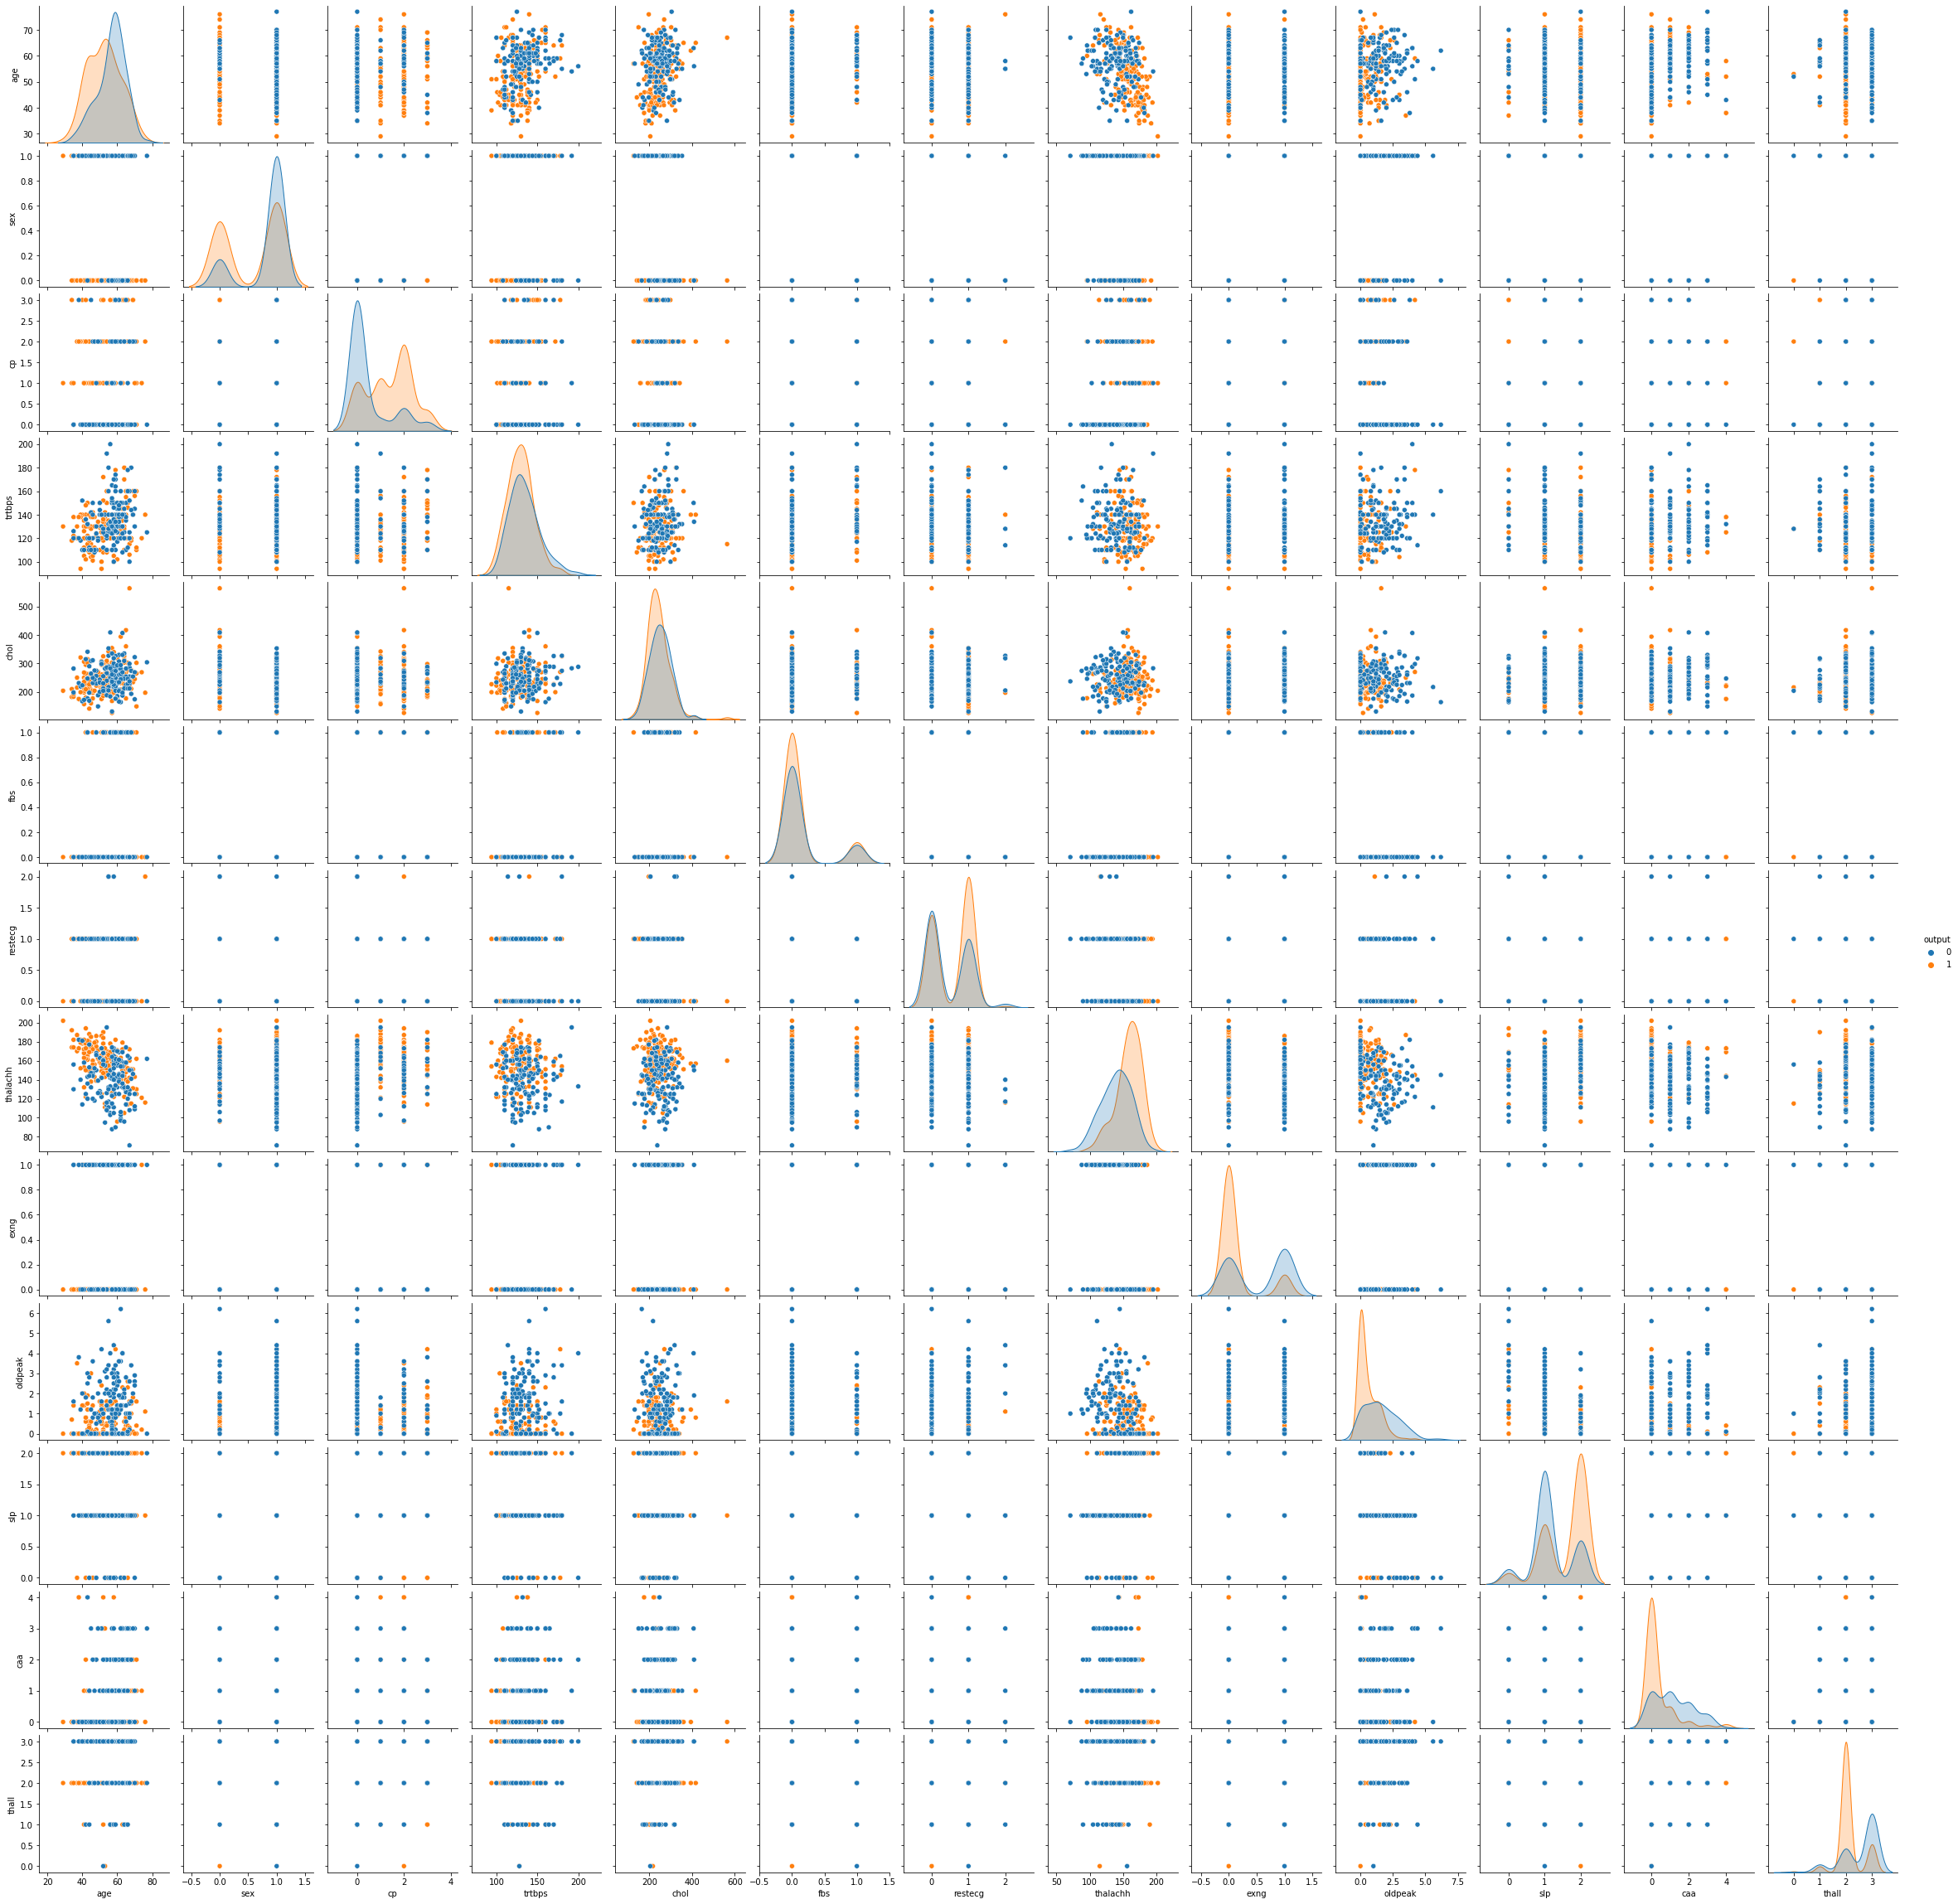

In [49]:
sns.pairplot(df,hue='output')

Data Processing

In [50]:
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exng','slp','caa','thall'])

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'chol','trtbps', 'thalachh', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [52]:
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [53]:
y=dataset['output']
x=dataset.drop(['output'],axis=1)

In [54]:
x.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [55]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [56]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=101) 

Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression  
log_cla= LogisticRegression(random_state=0)  
log_cla.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [58]:
y_pred= log_cla.predict(x_test)  

In [59]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm 

array([[31,  6],
       [ 3, 36]])

In [60]:
log_cla.score(x_test,y_test)

0.881578947368421

KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [63]:
y_pred=knn.predict(x_test)

In [64]:
knn.score(x_test,y_test)

0.7368421052631579

In [65]:
confusion_matrix(y_test,y_pred)

array([[25, 12],
       [ 8, 31]])

Choosing a K value

In [66]:
from sklearn.model_selection import cross_val_score
error_rate=[]
for i in range(1,60):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  error_rate.append(1-score.mean())

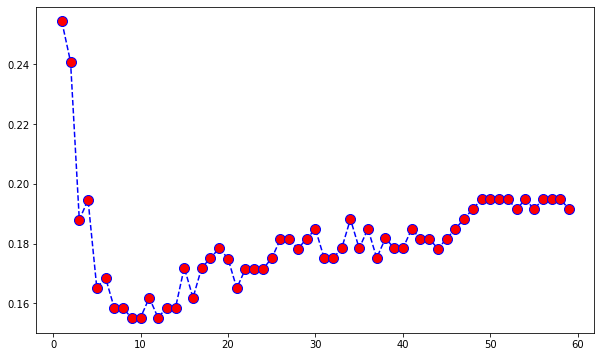

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

Graph Between Error Rate and K

In [68]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [69]:
y_pred=knn.predict(x_test)

In [70]:
knn.score(x_test,y_test)

0.868421052631579

In [71]:
knn.score(x_train,y_train)

0.8546255506607929

Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
n_b=GaussianNB()
n_b.fit(x_train, y_train)

GaussianNB()

In [74]:
y_pred=n_b.predict(x_test)

In [75]:
cm= confusion_matrix(y_test,y_pred) 
cm 

array([[23, 14],
       [ 2, 37]])

In [76]:
n_b.score(x_test,y_test)

0.7894736842105263

In [77]:
n_b.score(x_train,y_train)

0.788546255506608

Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred=dt.predict(x_test)

In [81]:
dt.score(x_test,y_test)

0.8289473684210527

In [82]:
dt.score(x_train,y_train)

1.0

In [83]:
cm= confusion_matrix(y_test,y_pred) 
cm 

array([[29,  8],
       [ 5, 34]])

Random Forest

In [84]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [85]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred=rfc.predict(x_test)

In [87]:
rfc.score(x_test,y_test)

0.8552631578947368

In [88]:
rfc.score(x_train,y_train)

1.0

In [89]:
confusion_matrix(y_test,y_pred)

array([[30,  7],
       [ 4, 35]])

Hyperparameters Tunning

In [90]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [91]:
param_grid={
            'n_estimators':n_estimators,
            'max_features':max_features,
             'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap

}

In [92]:
rfc=RandomForestClassifier()

In [93]:
from sklearn.model_selection import GridSearchCV
rfc_grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [94]:
rfc_grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [95]:
rfc_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 64}

In [96]:
rfc_grid.score(x_test,y_test)

0.8421052631578947

In [97]:
rfc_grid.score(x_train,y_train)

0.9030837004405287

CV scoring

In [98]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_cla,x,y,cv = 20, scoring='accuracy').mean()

0.8577083333333334

In [99]:
cross_val_score(knn,x_train,y_train,cv = 20, scoring='accuracy').mean()

0.8147727272727272

In [100]:
cross_val_score(n_b,x_train,y_train,cv = 20, scoring='accuracy').mean()

0.765530303030303

In [101]:
cross_val_score(dt,x_train,y_train,cv = 20, scoring='accuracy').mean()

0.7481060606060604

In [102]:
cross_val_score(rfc_grid,x,y,cv = 20, scoring='accuracy').mean()

Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 9

0.835